# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
# Set the API base URL
units = "metric"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
    # Parse the JSON and retrieve data
        city_weather = requests.get(city_url) 
        weather_json = city_weather.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

      # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 5 of Set 1 | pevek
Processing Record 6 of Set 1 | huarmey
Processing Record 7 of Set 1 | atuona
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | posadas
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | millinocket
Processing Record 13 of Set 1 | san cristobal
Processing Record 14 of Set 1 | norman wells
Processing Record 15 of Set 1 | viransehir
Processing Record 16 of Set 1 | vardo
Processing Record 17 of Set 1 | kaitangata
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | haines junction
Processing Record 20 of Set 1 | samusu
City not found. Skipping...
Processing Record 21 of Set 1 | bluff
Processing Record 22 of

Processing Record 36 of Set 4 | kanye
Processing Record 37 of Set 4 | sudak
Processing Record 38 of Set 4 | carnarvon
Processing Record 39 of Set 4 | amderma
City not found. Skipping...
Processing Record 40 of Set 4 | thompson
Processing Record 41 of Set 4 | kapaa
Processing Record 42 of Set 4 | lindi
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | shihezi
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | klaksvik
Processing Record 47 of Set 4 | aksu
Processing Record 48 of Set 4 | chokurdakh
Processing Record 49 of Set 4 | hithadhoo
Processing Record 0 of Set 5 | wajima
Processing Record 1 of Set 5 | la ronge
Processing Record 2 of Set 5 | butaritari
Processing Record 3 of Set 5 | waipawa
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | porto novo
Processing Record 6 of Set 5 | nara
Processing Record 7 of Set 5 | merauke
Processing Record 8 of Set 5 | puerto ayora
Processing Record 9 of Set 5 | mikropolis
Processing Re

Processing Record 31 of Set 8 | roald
Processing Record 32 of Set 8 | lyubech
Processing Record 33 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 34 of Set 8 | ribeira grande
Processing Record 35 of Set 8 | muros
Processing Record 36 of Set 8 | novoagansk
Processing Record 37 of Set 8 | fare
Processing Record 38 of Set 8 | bontang
Processing Record 39 of Set 8 | tuy hoa
Processing Record 40 of Set 8 | ankazobe
Processing Record 41 of Set 8 | thunder bay
Processing Record 42 of Set 8 | shirokiy
Processing Record 43 of Set 8 | hami
Processing Record 44 of Set 8 | beian
Processing Record 45 of Set 8 | pindiga
Processing Record 46 of Set 8 | kulhudhuffushi
Processing Record 47 of Set 8 | superior
Processing Record 48 of Set 8 | pangai
Processing Record 49 of Set 8 | laguna
Processing Record 0 of Set 9 | bhuj
Processing Record 1 of Set 9 | samba
Processing Record 2 of Set 9 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 9 | dingle
Processing Record 4 of 

Processing Record 20 of Set 12 | koulikoro
Processing Record 21 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 22 of Set 12 | peleduy
Processing Record 23 of Set 12 | shugurovo
Processing Record 24 of Set 12 | khasan
Processing Record 25 of Set 12 | kenai
Processing Record 26 of Set 12 | aguimes
Processing Record 27 of Set 12 | kalmunai
Processing Record 28 of Set 12 | abalak
Processing Record 29 of Set 12 | nioro
Processing Record 30 of Set 12 | alexandria
Processing Record 31 of Set 12 | walvis bay
Processing Record 32 of Set 12 | riachao do jacuipe
Processing Record 33 of Set 12 | tabukiniberu
City not found. Skipping...
Processing Record 34 of Set 12 | ajjampur
Processing Record 35 of Set 12 | chernyshevskiy
Processing Record 36 of Set 12 | finschhafen
Processing Record 37 of Set 12 | tairua
Processing Record 38 of Set 12 | itaberai
Processing Record 39 of Set 12 | ongandjera
Processing Record 40 of Set 12 | ankara
Processing Record 41 of Set 12 | saint-pierre

In [21]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [22]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,12.80,78,50,7.20,CL,1680817233
1,mataura,-46.1927,168.8643,8.53,64,86,1.18,NZ,1680817233
2,hobart,-42.8794,147.3294,13.92,96,75,0.00,AU,1680817052
3,pevek,69.7008,170.3133,-23.05,79,4,0.70,RU,1680817238
4,huarmey,-10.0681,-78.1522,25.25,85,9,5.53,PE,1680817239


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,12.80,78,50,7.20,CL,1680817233
1,mataura,-46.1927,168.8643,8.53,64,86,1.18,NZ,1680817233
2,hobart,-42.8794,147.3294,13.92,96,75,0.00,AU,1680817052
3,pevek,69.7008,170.3133,-23.05,79,4,0.70,RU,1680817238
4,huarmey,-10.0681,-78.1522,25.25,85,9,5.53,PE,1680817239


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

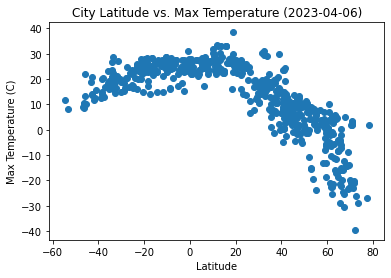

In [28]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.scatter(lat, temp)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2023-04-06)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

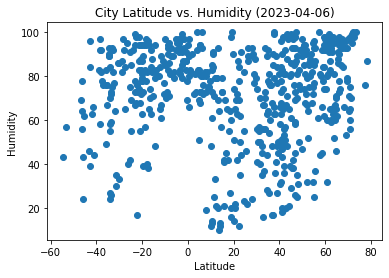

In [29]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(lat, humidity)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2023-04-06)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

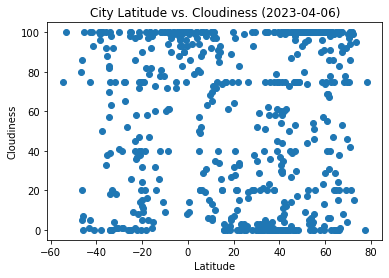

In [30]:
# Build the scatter plots for latitude vs. cloudiness
cloud = city_data_df["Cloudiness"]

plt.scatter(lat, cloud)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2023-04-06)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

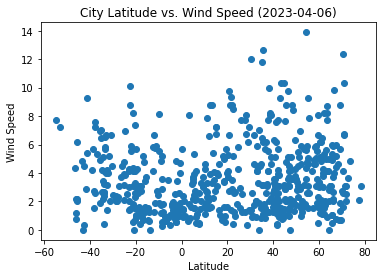

In [31]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]

plt.scatter(lat, wind_speed)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2023-04-06)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [76]:
# Define a function to create Linear Regression plots
def compute_reg (x_value, y_value, y_label, eq_spot):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    
    # Get regression values
    regress_values = x_value * slope + intercept

    # Print linear equation
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    # Create Plot
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,eq_spot,fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue**2}")

    # Show plot
    plt.show()

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern = city_data_df[city_data_df["Lat"] >= 0]
northern_hemi_df = pd.DataFrame(northern)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,pevek,69.7008,170.3133,-23.05,79,4,0.70,RU,1680817238
10,millinocket,45.6573,-68.7098,4.06,93,100,2.06,US,1680817240
11,san cristobal,7.7669,-72.2250,22.10,73,98,0.43,VE,1680817240
12,norman wells,65.2820,-126.8329,-7.98,62,100,3.09,CA,1680817240
13,viransehir,37.2353,39.7631,7.52,90,1,1.28,TR,1680817240


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7412847918645319


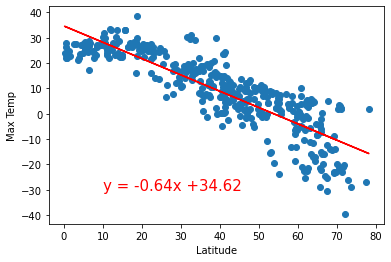

In [78]:
# Linear regression on Northern Hemisphere
n_lat = northern_hemi_df["Lat"]
n_temp = northern_hemi_df["Max Temp"]

compute_reg(n_lat, n_temp, "Max Temp", (10,-30))

The r-value is: 0.4236245924127907


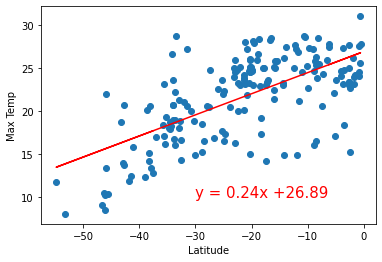

In [79]:
# Linear regression on Southern Hemisphere
s_lat = southern_hemi_df["Lat"]
s_temp = southern_hemi_df["Max Temp"]

compute_reg(s_lat, s_temp, "Max Temp", (-30,10))

**Analysis on relationship between maximum temperature and latitude:**

There is a negative relationship between maximum temperature and latitude in the northern hemisphere, while there is a positive relationship between maximum temperature and latitude in the southern hemisphere. This translates to the farther north the location, the colder the temperatures and contrarily, the farther south the location, the colder it becomes. The south pole is colder than the equator, but does not get as cold as the north pole. The change in temperature in the north changes more drastically as you move coordinates, as we can see the slope is -0.64 while in the north each point you move latitude, there is a 0.24 increase in temperature. Finally, the equator shows the warmest temperatures with an intercept of 26.89 from the south and 34.6 degrees Celcius from the north. The r-value conveys that 74.13% of the change in maximum temperature is accounted by the latitutde position in the northern hemisphere and 0.42 for the southern hemisphere respectively. 



### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.059930093381388556


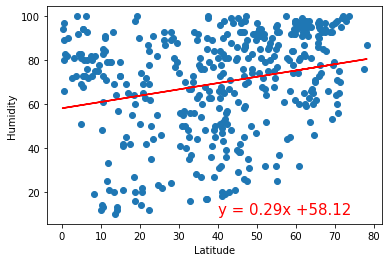

In [80]:
# Linear regression on Northern Hemisphere
n_humidity = northern_hemi_df["Humidity"]

compute_reg(n_lat, n_humidity, "Humidity", (40,10))

The r-value is: 0.1787689082971753


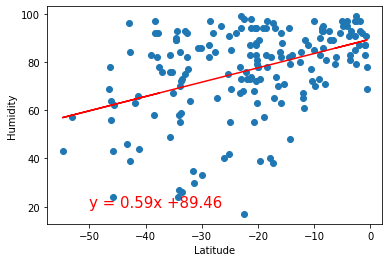

In [81]:
# Southern Hemisphere
s_humidity = southern_hemi_df["Humidity"]

compute_reg(s_lat, s_humidity, "Humidity", (-50,20))

**Analysis on relationship between humidity and latitude:**

The relationship between humidity and the latitude coordinates have a positive relationship in the northern and southern hemisphere. The slope at which the humidity increases in the south is almost twice as fast as the north. There is a slope of 0.29 with the northern hemisphere data and 0.59 with the southern hemisphere data. The r-value demonstrates that 5.99% of the variation in humidity is accounted by the latitude value in the northern hemisphere, and 17.87% in the south. The intercept or humidity at the equator is 89.46 in terms of the southern hemisphere data points, and 58.12 with the northern hemisphere points.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.010749287468138214


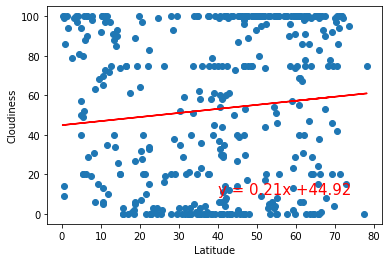

In [86]:
# Northern Hemisphere
n_cloud = northern_hemi_df["Cloudiness"]

compute_reg(n_lat, n_cloud, "Cloudiness", (40,10))

The r-value is: 0.0854836342079316


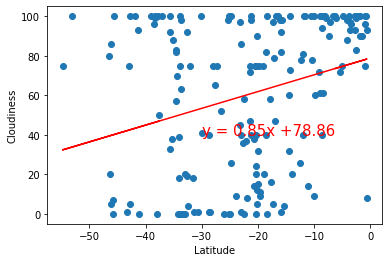

In [82]:
# Southern Hemisphere
s_cloud = southern_hemi_df["Cloudiness"]

compute_reg(s_lat, s_cloud, "Cloudiness", (-30,40))

**Analysis on relationship of cloudiness and latitude:**

Cloudiness has a positive relationship to latitude position in both hemispheres. The rate at which cloudiness increases in the south is nearly four times higher than the south. For a change in latitude position toward the north, there is a 0.21 change in cloudiness in the north, and 0.85 in the south.  The cloudiness and latitude relationship shows a stronger correlation in the south than in the north. The r-value shows 1.07% of cloudiness is attributed to latitude position in the northern hemisphere and 8.55% in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0120099660438469


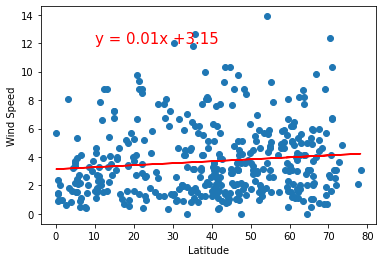

In [87]:
# Northern Hemisphere
n_wind_speed = northern_hemi_df["Wind Speed"]

compute_reg(n_lat, n_wind_speed, "Wind Speed", (10,12))

The r-value is: 0.12028880368532337


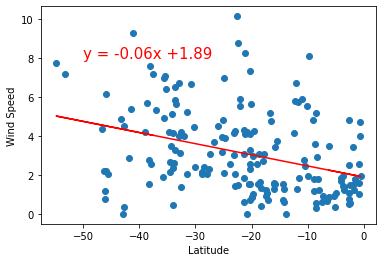

In [88]:
# Southern Hemisphere
s_wind_speed = southern_hemi_df["Wind Speed"]

compute_reg(s_lat, s_wind_speed, "Wind Speed", (-50,8))

**Analysis on relationship of wind speed and latitude:**

There is nearly no relationship between wind speed and latitude in the northern hemisphere, there is only a slight positive relationship. For an increase in latitude, there is 0.01 increase in wind speed. In the southern hemisphere, there is a negative relationship between wind speed and latitude. For each increase in latitude, there is about a -0.06 decrease in wind speed. The r-value shows that on average 1.20% and 12.03% of the wind speed changes are attributed to the change in latitude for the northern and southern hemispheres respectively.